In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = {
    "Nitrogen":      [40, 50, 60, 55, 70, 65, 45, 80, 75, 60, 50, 55, 65, 85, 90],
    "Phosphorus":    [20, 25, 30, 22, 35, 33, 18, 40, 36, 28, 24, 26, 32, 42, 45],
    "Potassium":     [25, 30, 35, 28, 40, 38, 20, 45, 42, 32, 28, 30, 36, 48, 50],
    "Rainfall_mm":   [120, 140, 160, 130, 180, 170, 110, 200, 190, 150, 135, 145, 175, 210, 220],
    "Temperature_C": [24, 25, 26, 23, 27, 26, 22, 28, 27, 25, 24, 23, 26, 29, 30],
    "Fertilizer_kg": [30, 35, 40, 32, 45, 42, 28, 50, 48, 38, 34, 36, 43, 52, 55],
    "Soil_pH":       [6.2, 6.5, 6.8, 6.0, 7.0, 6.7, 6.1, 7.2, 7.0, 6.6, 6.3, 6.4, 6.9, 7.3, 7.4],
    
    # Target (Crop Yield — kg per acre)
    "Yield":         [1800, 2000, 2300, 1900, 2600, 2500, 1700, 2900, 2750, 2250,
                      2050, 2100, 2450, 3000, 3150]
}

df = pd.DataFrame(data)
df

,Nitrogen,Phosphorus,Potassium,Rainfall_mm,Temperature_C,Fertilizer_kg,Soil_pH,Yield
0,40,20,25,120,24,30,6.2,1800
1,50,25,30,140,25,35,6.5,2000
2,60,30,35,160,26,40,6.8,2300
3,55,22,28,130,23,32,6.0,1900
4,70,35,40,180,27,45,7.0,2600
5,65,33,38,170,26,42,6.7,2500
6,45,18,20,110,22,28,6.1,1700
7,80,40,45,200,28,50,7.2,2900
8,75,36,42,190,27,48,7.0,2750
9,60,28,32,150,25,38,6.6,2250


In [3]:
print(df.shape)
df.info()

# Summary statistics
df.describe()

(15, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nitrogen       15 non-null     int64  
 1   Phosphorus     15 non-null     int64  
 2   Potassium      15 non-null     int64  
 3   Rainfall_mm    15 non-null     int64  
 4   Temperature_C  15 non-null     int64  
 5   Fertilizer_kg  15 non-null     int64  
 6   Soil_pH        15 non-null     float64
 7   Yield          15 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 1.1 KB


,Nitrogen,Phosphorus,Potassium,Rainfall_mm,Temperature_C,Fertilizer_kg,Soil_pH,Yield
count,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,63.000000,30.40000,35.133333,162.333333,25.666667,40.533333,6.693333,2363.333333
std,14.735768,8.14862,8.700301,33.373785,2.288689,8.262364,0.441534,449.788310
min,40.000000,18.00000,20.000000,110.000000,22.000000,28.000000,6.000000,1700.000000
25%,52.500000,24.50000,29.000000,137.500000,24.000000,34.500000,6.350000,2025.000000
50%,60.000000,30.00000,35.000000,160.000000,26.000000,40.000000,6.700000,2300.000000
75%,72.500000,35.50000,41.000000,185.000000,27.000000,46.500000,7.000000,2675.000000
max,90.000000,45.00000,50.000000,220.000000,30.000000,55.000000,7.400000,3150.000000


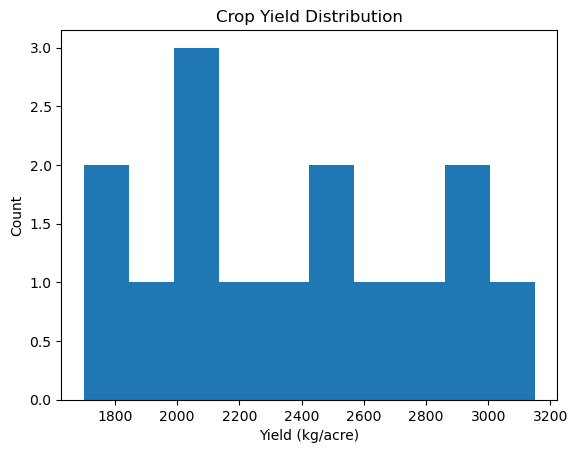

In [4]:
plt.hist(df["Yield"])
plt.title("Crop Yield Distribution")
plt.xlabel("Yield (kg/acre)")
plt.ylabel("Count")
plt.show()

In [5]:
X = df[[
    "Nitrogen", "Phosphorus", "Potassium",
    "Rainfall_mm", "Temperature_C",
    "Fertilizer_kg", "Soil_pH"
]]

y = df["Yield"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)

print("Predicted:", y_pred)
print("Actual:", list(y_test))

Predicted: [2239.71241808 2213.38702582 1728.00694844 2947.26348798]
Actual: [2250, 2100, 1800, 3000]


In [9]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 5231.647784733628
Root Mean Squared Error: 72.33013054553149
R² Score: 0.9732353750421301


In [10]:
custom_input = pd.DataFrame({
    "Nitrogen": [65],
    "Phosphorus": [32],
    "Potassium": [36],
    "Rainfall_mm": [180],
    "Temperature_C": [26],
    "Fertilizer_kg": [42],
    "Soil_pH": [6.8]
})

predicted_yield = model.predict(custom_input)
print("Predicted Crop Yield (kg/acre):", predicted_yield[0])

Predicted Crop Yield (kg/acre): 2340.5947909264205
